# Workshop - Analysis of Geometric Shapes: Centroid, Area, and Perimeter

## Load binary image

In [1]:
import cv2

img = cv2.imread('../data/Lenna.png')
assert img is not None, 'Failed to load image'

# Convert to grayscale
img_gray = cv2.cvtColor(
    img,
    cv2.COLOR_BGR2GRAY,
)


# Threshold the image
_, thresh = cv2.threshold(
    img_gray,
    127,
    255,
    cv2.THRESH_BINARY,
)

thresh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], shape=(250, 250), dtype=uint8)

## Find contours

In [2]:
contours, hierarchy = cv2.findContours(
    thresh,
    cv2.RETR_TREE, # Retrieves all contours and reconstructs a full hierarchy of nested contours
    cv2.CHAIN_APPROX_SIMPLE, # Reduces the number of points in the contour
)

print(f'Number of contours found: {len(contours)}')

Number of contours found: 252


### Calculate properties of contours

In [3]:
from dataclasses import dataclass


@dataclass
class ContourInfo:
    area: float
    perimeter: float
    centroid: tuple[int, int] | None
    raw: cv2.typing.MatLike

    def __str__(self) -> str:
        return f'Area: {self.area}, Perimeter: {self.perimeter}, Centroid: {self.centroid}'

    def __repr__(self) -> str:
        return f'<ContourInfo area={self.area} perimeter={self.perimeter} centroid={self.centroid} raw={self.raw!r}>'

In [4]:
contours_info = [
    ContourInfo(
        area=cv2.contourArea(c),
        perimeter=cv2.arcLength(c, True),
        centroid=(
            int(moments['m10'] / moments['m00']),
            int(moments['m01'] / moments['m00']),
        ) if moments['m00'] != 0 else None,
        raw=c,
    )
    for c, moments in ((c, cv2.moments(c)) for c in contours)
]

## Draw contours on the image
We will display the contours on the original image and also show the calculated
properties such as centroid, area, and perimeter.

In [5]:
from pathlib import Path

OUTPUT_IMG_PATH = Path('../results/contours.png')

# Draw contours on the copy of the image
output_img = img.copy()

# Draw contours on the copy of the image
for i, c in enumerate(contours_info):
    print(f'Drawing contour {i+1}/{len(contours_info)}: {c}')
    cv2.drawContours(
        output_img,
        contours,
        i,
        (0, 255, 0),
        2,
    )

# Create final image with contours
cv2.imwrite(str(OUTPUT_IMG_PATH), output_img)

Drawing contour 1/252: Area: 0.0, Perimeter: 0.0, Centroid: None
Drawing contour 2/252: Area: 0.0, Perimeter: 0.0, Centroid: None
Drawing contour 3/252: Area: 3.0, Perimeter: 8.0, Centroid: (208, 248)
Drawing contour 4/252: Area: 1.5, Perimeter: 5.414213538169861, Centroid: (200, 248)
Drawing contour 5/252: Area: 0.0, Perimeter: 2.0, Centroid: None
Drawing contour 6/252: Area: 1.0, Perimeter: 4.828427076339722, Centroid: (231, 248)
Drawing contour 7/252: Area: 0.0, Perimeter: 2.0, Centroid: None
Drawing contour 8/252: Area: 0.0, Perimeter: 0.0, Centroid: None
Drawing contour 9/252: Area: 0.0, Perimeter: 9.656854152679443, Centroid: None
Drawing contour 10/252: Area: 0.5, Perimeter: 8.242640614509583, Centroid: (77, 239)
Drawing contour 11/252: Area: 0.0, Perimeter: 0.0, Centroid: None
Drawing contour 12/252: Area: 0.0, Perimeter: 0.0, Centroid: None
Drawing contour 13/252: Area: 11.5, Perimeter: 32.041630268096924, Centroid: (73, 230)
Drawing contour 14/252: Area: 2.0, Perimeter: 5.656

True

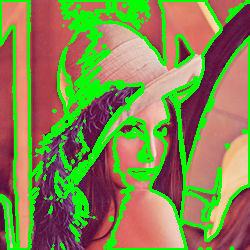

In [6]:
from IPython.display import Image

Image(filename=OUTPUT_IMG_PATH)